# Black Friday Dataset EDA and Feature Engineering: 

### Cleaning and preparing the data :

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the train dataset:
df_train=pd.read_csv("blackFriday_train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
# importing the test dataset:
df_test=pd.read_csv("blackFriday_test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [4]:
# Merge both train and test data:
df=df_train.append(df_test)
df.head()

C:\Users\Prashant Pathak\AppData\Local\Temp\ipykernel_14244\2410865674.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
# informetion of dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
# describe
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
# drop user id column:
df.drop(['User_ID'],axis=1,inplace=True)


In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


####  Handling categorical features:

In [9]:
(df["Gender"])=df["Gender"].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
df["Gender"].unique()

array([0, 1], dtype=int64)

In [11]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
(df['Age'])=df["Age"].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
(df['City_Category'])=df['City_Category'].map({'A':1, 'C':2, 'B':3})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,2,4+,0,8,NaN,NaN,7969.0


In [16]:
df['City_Category'].unique()

array([1, 2, 3], dtype=int64)

In [17]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\Prashant Pathak\AppData\Local\Temp\ipykernel_14244\2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [19]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

#### Handling Missing values:

In [20]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [21]:
# replacing missing values in df['Product_Category_2']:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [23]:
(df['Product_Category_2'])=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [24]:
df['Product_Category_2'].isnull().sum()

0

In [25]:
# replacing missing values in Product_Category_3:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [26]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [27]:
(df['Product_Category_3'])=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [28]:
df['Product_Category_3'].isnull().sum()

0

In [29]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969.0


In [30]:
df.shape

(783667, 11)

#### Handling data type:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 71.7+ MB


In [32]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 68.8+ MB


### Visualization:

In [66]:
df["Product_ID"].value_counts()


P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00185942       1
P00104342       1
P00074742       1
P00081342       1
P00253842       1
Name: Product_ID, Length: 3677, dtype: int64

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    590031
0    193636
Name: Gender, dtype: int64


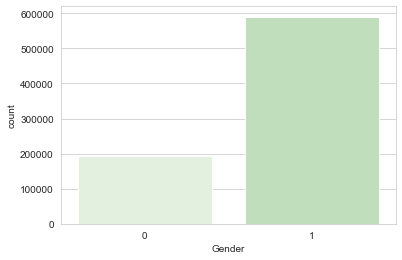

In [67]:
sns.set_style('whitegrid')
sns.countplot("Gender",data=df)
print(df["Gender"].value_counts())

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    313015
4    156724
2    141953
5     65278
6     54784
7     30579
1     21334
Name: Age, dtype: int64


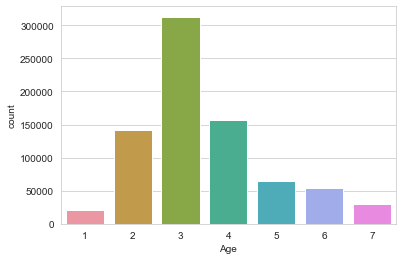

In [49]:
sns.set_style('whitegrid')
sns.countplot("Age",data=df)
print(df["Age"].value_counts())

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64


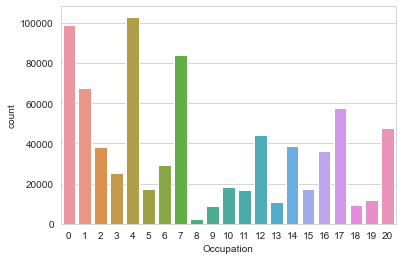

In [52]:
sns.set_style('whitegrid')
sns.countplot("Occupation",data=df)
print(df["Occupation"].value_counts())

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    329739
2    243684
1    210244
Name: City_Category, dtype: int64


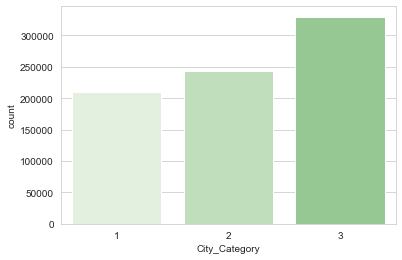

In [53]:
sns.set_style('whitegrid')
sns.countplot("City_Category",data=df)
print(df["City_Category"].value_counts())

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64


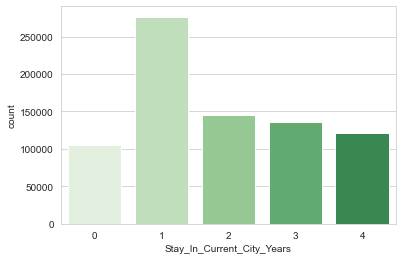

In [54]:
sns.set_style('whitegrid')
sns.countplot("Stay_In_Current_City_Years",data=df)
print(df["Stay_In_Current_City_Years"].value_counts())

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    462538
1    321129
Name: Marital_Status, dtype: int64


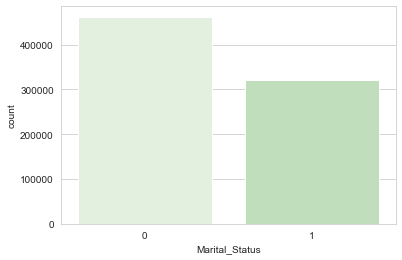

In [55]:
sns.set_style('whitegrid')
sns.countplot("Marital_Status",data=df)
print(df["Marital_Status"].value_counts())

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64


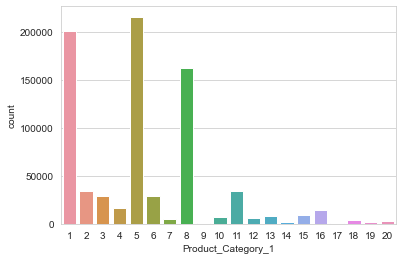

In [56]:
sns.set_style('whitegrid')
sns.countplot("Product_Category_1",data=df)
print(df["Product_Category_1"].value_counts())

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64


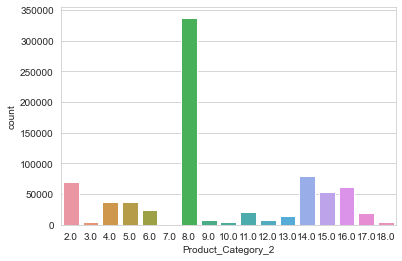

In [68]:
sns.set_style('whitegrid')
sns.countplot("Product_Category_2",data=df)
print(df["Product_Category_2"].value_counts())

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


16.0    592278
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: Product_Category_3, dtype: int64


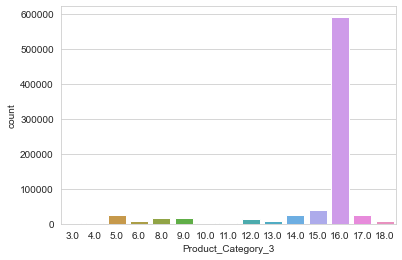

In [69]:
sns.set_style('whitegrid')
sns.countplot("Product_Category_3",data=df)
print(df["Product_Category_3"].value_counts())

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

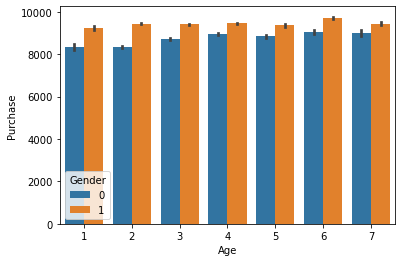

In [35]:
sns.barplot('Age','Purchase',hue='Gender',data=df)


Result 01. Male purchesing in all age categories is greater then Females

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

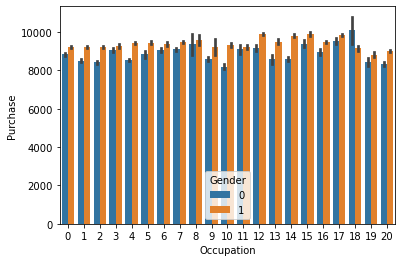

In [36]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

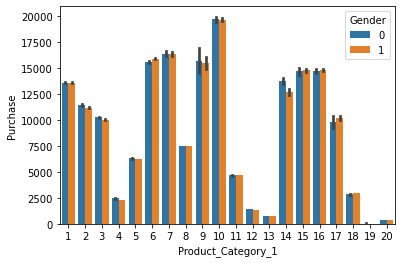

In [37]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

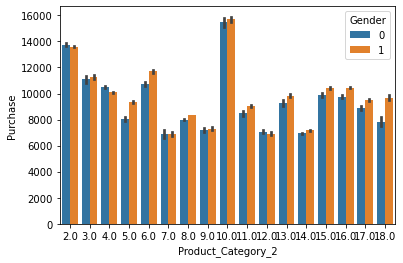

In [38]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

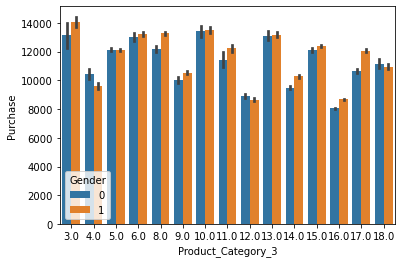

In [39]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)